Deep Learning Tutorial to Calculate the Screen Time of Actors in any Video (with Python codes)

# Table of Contents
Reading a video and extracting frames
How to handle video files in Python
Calculating the screen time – A simple Solution
My learnings – what worked and what did not

# Step – 1: Read the video, extract frames from it and save them as images

In [2]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
# from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
count = 0
videoFile = "Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


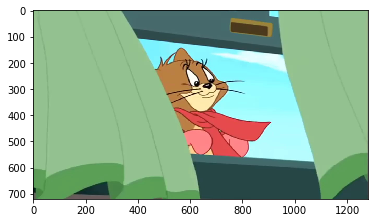

In [4]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)

# Step – 2: Label a few images for training the model

In [5]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()      # printing first five rows of the file

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [6]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [7]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [8]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [9]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')      # preprocessing the input data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

# Step 3: Building the model

In [11]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

58892288/58889256 [==============================] - 120s 2us/step


In [13]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [17]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512)

In [18]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

Finally, we will build our model. This step can be divided into 3 sub-steps:

Building the model
Compiling the model
Training the model

In [19]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [21]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# iii. Training the model
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 12s 56ms/step - loss: 1.1876 - acc: 0.4519 - val_loss: 1.3402 - val_acc: 0.3667
Epoch 2/100
208/208 [==============================] - 6s 27ms/step - loss: 0.3488 - acc: 0.9038 - val_loss: 1.3129 - val_acc: 0.3667
Epoch 3/100
208/208 [==============================] - 6s 28ms/step - loss: 0.1752 - acc: 0.9615 - val_loss: 1.3013 - val_acc: 0.3667
Epoch 4/100
208/208 [==============================] - 6s 30ms/step - loss: 0.1008 - acc: 0.9808 - val_loss: 1.2258 - val_acc: 0.3667
Epoch 5/100
208/208 [==============================] - 8s 37ms/step - loss: 0.0716 - acc: 0.9856 - val_loss: 1.2342 - val_acc: 0.3667
Epoch 6/100
208/208 [==============================] - 7s 33ms/step - loss: 0.0518 - acc: 0.9952 - val_loss: 1.2569 - val_acc: 0.3667
Epoch 7/100
208/208 [==============================] - 6s 29ms/step - loss: 0.0405 - acc: 0.9952 - val_loss: 1.1776 - val_acc: 0.3667
Epoch 8/100
208/

208/208 [==============================] - 5s 25ms/step - loss: 0.0106 - acc: 0.9952 - val_loss: 1.0488 - val_acc: 0.3667
Epoch 62/100
208/208 [==============================] - 5s 25ms/step - loss: 0.0135 - acc: 0.9952 - val_loss: 1.0466 - val_acc: 0.3667
Epoch 63/100
208/208 [==============================] - 5s 26ms/step - loss: 0.0196 - acc: 0.9904 - val_loss: 1.1469 - val_acc: 0.3667
Epoch 64/100
208/208 [==============================] - 5s 26ms/step - loss: 0.0187 - acc: 0.9952 - val_loss: 0.9855 - val_acc: 0.4111
Epoch 65/100
208/208 [==============================] - 6s 27ms/step - loss: 0.0168 - acc: 0.9952 - val_loss: 1.1263 - val_acc: 0.3667
Epoch 66/100
208/208 [==============================] - 6s 27ms/step - loss: 0.0088 - acc: 0.9952 - val_loss: 1.1664 - val_acc: 0.3667
Epoch 67/100
208/208 [==============================] - 5s 26ms/step - loss: 0.0113 - acc: 0.9952 - val_loss: 1.0813 - val_acc: 0.3667
Epoch 68/100
208/208 [==============================] - 5s 26ms/step

# Calculating the screen time – A simple solution

In [23]:
count = 0
videoFile = "Test\Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [26]:
test = pd.read_csv('Test/test.csv')

In [27]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [28]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [29]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(186, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

# Step – 4: Make predictions for the remaining images

In [30]:
predictions = model.predict_classes(test_image)

# Step – 5 Calculate the screen time of both TOM and JERRY

In [31]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")

The screen time of JERRY is 6 seconds
The screen time of TOM is 134 seconds
